In [115]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [27]:
data = pd.read_csv('option_train.csv')

In [28]:
data.head()

,Value,S,K,tau,r,BS
0,21.670404,431.623898,420.0,0.341270,0.03013,Under
1,0.125000,427.015526,465.0,0.166667,0.03126,Over
2,20.691244,427.762336,415.0,0.265873,0.03116,Under
3,1.035002,451.711658,460.0,0.063492,0.02972,Over
4,39.553020,446.718974,410.0,0.166667,0.02962,Under


In [29]:
data['BS'] = pd.factorize(data['BS'])[0]
data.head()

,Value,S,K,tau,r,BS
0,21.670404,431.623898,420.0,0.341270,0.03013,0
1,0.125000,427.015526,465.0,0.166667,0.03126,1
2,20.691244,427.762336,415.0,0.265873,0.03116,0
3,1.035002,451.711658,460.0,0.063492,0.02972,1
4,39.553020,446.718974,410.0,0.166667,0.02962,0


In [30]:
data = data[data['S'].notna()]
data = data[data['Value'].notna()]

In [31]:
from sklearn.impute import KNNImputer
df1 = data.copy()

In [17]:
# imputer = KNNImputer(n_neighbors = 5, weights = 'distance', metric = 'nan_euclidean')
# df1 = pd.DataFrame(imputer.fit_transform(df1.iloc[:, 1:5]))
# df1.describe()

In [32]:
from scipy import stats
import numpy as np

In [33]:
df_10 = stats.zscore(data)

In [34]:
df_10 = np.abs(df_10)
df_10

,Value,S,K,tau,r,BS
0,0.469961,0.033687,0.779510,0.013674,0.189613,0.880115
1,1.064706,0.038418,1.142899,0.038407,1.838029,1.136215
2,0.400216,0.037652,0.993111,0.024354,1.658591,0.880115
3,0.999887,0.013062,0.929298,0.053021,0.925306,1.136215
4,1.743730,0.018188,1.206712,0.038407,1.104743,0.880115
...,...,...,...,...,...,...
1675,0.968902,0.020572,1.570102,0.023230,0.187205,1.136215
1676,1.414244,0.026674,1.206712,0.019295,0.925306,0.880115
1677,1.855915,0.037364,2.061116,0.037845,2.950540,0.880115
1678,1.042268,0.026030,1.783703,0.020419,1.104743,1.136215


In [35]:
df_10[df_10['S'] > 3]
df_10[df_10['tau'] > 3]



,Value,S,K,tau,r,BS
12,0.908713,0.016166,1.356500,35.350483,0.189613,1.136215
33,0.890906,0.019909,0.715697,20.618884,0.369050,1.136215


In [45]:
df1.at[df1.loc[df_10['S'] > 3].index[0], 'S']

40333.0

In [ ]:
for index, rows in dd:
    df1.at[]

In [46]:
df1.at[df1.loc[df_10['S'] > 3].index[0], 'S'] = None
df1.at[df1.loc[df_10['tau'] > 3].index[0], 'tau'] = None
df1.at[df1.loc[df_10['tau'] > 3].index[1], 'tau'] = None

In [59]:
#Filtering by definition

df1.at[df1.loc[df1['S'] == 0].index[0], 'S'] = None
if(len(df1.loc[df1['K'] == 0])):
    for i in range(0, len(df1.loc[df1['K'] == 0])):
        df1.at[df1.loc[df1['K'] == 0].index[i], 'K'] = None




In [72]:
df2.sort_values(by=2)

,0,1,2,3
1334,431.949649,435.0,0.003968,0.02951
1013,451.916200,450.0,0.003968,0.03013
1264,431.949649,430.0,0.003968,0.02951
1454,433.299197,420.0,0.007937,0.03065
1582,433.302407,420.0,0.007937,0.02972
...,...,...,...,...
1384,451.221255,415.0,0.392857,0.03044
1254,451.221255,440.0,0.392857,0.03044
57,451.221255,480.0,0.392857,0.03044
1438,451.221255,410.0,0.392857,0.03044


In [66]:
imputer = KNNImputer(n_neighbors = 5, weights = 'distance', metric = 'nan_euclidean')
df2 = pd.DataFrame(imputer.fit_transform(df1.iloc[:, 1:5]))
df2.describe()

,0,1,2,3
count,1677.000000,1677.000000,1677.000000,1677.000000
mean,440.917087,438.246869,0.201901,0.030236
std,7.528774,23.415106,0.099776,0.000557
min,425.472331,375.000000,0.003968,0.029510
25%,433.886762,420.000000,0.119048,0.029820
50%,442.634081,440.000000,0.202381,0.030130
75%,447.320414,455.000000,0.285714,0.030540
max,455.880619,500.000000,0.392857,0.031880


In [73]:
X = df2
y = data['Value']

0       21.670404
1        0.125000
2       20.691244
3        1.035002
4       39.553020
          ...    
1675     1.470000
1676    34.927317
1677    41.127997
1678     0.440003
1679     0.410002
Name: Value, Length: 1677, dtype: float64

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=10)

In [90]:
rf = RandomForestRegressor(n_estimators = 50, max_features = 'sqrt', max_depth = 10, random_state = 10).fit(X_train, y_train)

In [91]:
prediction = rf.predict(X_test)
mse = mean_squared_error(y_test, prediction)
r2 = r2_score(y_test,prediction)
print(mse)
print(r2)

1.2199928634093262
0.9930220734683485


In [96]:
X_cl = df2
y_cl = data[['BS']]

In [106]:
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(X_cl, y_cl,test_size=0.30,random_state=2)

In [107]:
clf_rf = RandomForestClassifier(random_state=1, n_estimators = 50)
clf_rf.fit(X_train_cl, y_train_cl)
y_pred_rf = clf_rf.predict(X_test_cl)
score_test_rf = accuracy_score(y_test_cl, y_pred_rf)
print("The classification Accuracy is {}".format(round(score_test_rf,2)))

The classification Accuracy is 0.93


C:\Users\trivi\AppData\Local\Temp\ipykernel_38692\1420049712.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rf.fit(X_train_cl, y_train_cl)


Area Under Curve (AUC) is 0.981349757113116


<Figure size 640x480 with 0 Axes>

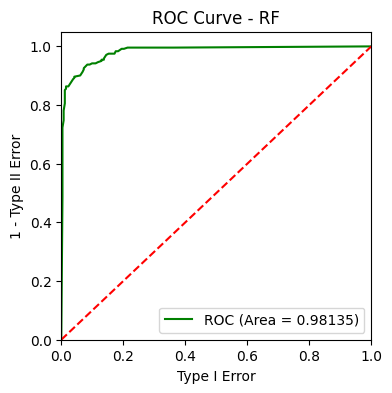

In [116]:
#Getting the probabilities
y_proba = clf_rf.predict_proba(X_test_cl)

# Getting the probabilities
y_prob = y_proba[:, 1]

# Calculating the false positive rate and true positive rate
fpr, tpr, threshold = roc_curve(y_test_cl, y_prob)

# Calculating the AUC score
auc = roc_auc_score(y_test_cl, y_prob)


# Plotting the ROC curve
plt.figure()
plt.figure(figsize=(4,4))
plt.plot(fpr, tpr, label = 'ROC (Area = {0:.5f})'.format(auc), color = 'green')
plt.plot([0, 1], [0, 1], color = 'red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc = "lower right")
plt.xlabel('Type I Error')
plt.ylabel('1 - Type II Error')
plt.title('ROC Curve - RF')


print('Area Under Curve (AUC) is', auc)




In [ ]:
# Creating a model for predicting the testing values (Training on the whole dataset)

In [117]:
test_data = pd.read_csv('option_test_wolabel.csv')
test_data.head()

,S,K,tau,r
0,431.618600,460,0.293651,0.03147
1,432.633296,420,0.182540,0.03147
2,432.633296,430,0.182540,0.03147
3,431.618600,415,0.293651,0.03147
4,434.772855,420,0.043651,0.03147


In [118]:
test_data.shape

(1120, 4)

In [125]:
X = df2
y = data[['BS']]

In [126]:
clf_rf = RandomForestClassifier(random_state=1, n_estimators = 50)
clf_rf.fit(X, y)
y_pred_rf = clf_rf.predict(test_data)


C:\Users\trivi\AppData\Local\Temp\ipykernel_38692\819429179.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rf.fit(X, y)
C:\Users\trivi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [127]:
len(y_pred_rf)

1120

In [128]:
rf = RandomForestRegressor(n_estimators = 50, max_features = 'sqrt', max_depth = 10, random_state = 10).fit(X_train, y_train)

In [129]:
prediction = rf.predict(test_data)
print(prediction)
len(prediction)
# mse = mean_squared_error(y_test, prediction)
# r2 = r2_score(y_test,prediction)
# print(mse)
# print(r2)

[ 1.9987107  18.31492371  9.58735747 ...  0.92384216 24.30704996
 14.77629373]


C:\Users\trivi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


1120

In [134]:
final_output = pd.DataFrame()
final_output['Value'] = prediction
final_output['BS'] = y_pred_rf
final_output.to_csv('group_34_prediction.csv', index=False)

In [ ]:
############################################
# Appendix
# Other Models

In [135]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = LinearRegression()

In [85]:
model.fit(X_train, y_train)
in_sample_r_square = model.score(X_train, y_train)
out_of_sample_r_square = model.score(X_test, y_test)

In [86]:
out_of_sample_r_square

0.9148114682358571

In [87]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [88]:
kfolds_regresssion = KFold(n_splits = 5, random_state = 1, shuffle = True)
regresssion_model = LinearRegression()
r2_model_1_cv = cross_val_score(regresssion_model, X, y, cv=kfolds_regresssion)

In [89]:
np.mean(r2_model_1_cv)

0.9102287981733787

In [90]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
neigh = KNeighborsRegressor(n_neighbors=8)

neigh.fit(X_train, y_train)

In [93]:
neigh.score(X_test, y_test)

0.9674403343478979

KNN Classifier

In [99]:
X = df2
y = data['BS']

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [103]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [113]:
clf = RandomForestClassifier(max_depth=10, random_state=0)

In [114]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [115]:
clf.score(X_test, y_test)

0.9404761904761905

In [117]:
from sklearn.metrics import accuracy_score

In [132]:
accuracy_score(X_test, y_test)

In [1]:
import pandas as pd

In [5]:
word_site = "http://www.instructables.com/files/orig/FLU/YE8L/H82UHPR8/FLUYE8LH82UHPR8.txt"
response = urllib2.urlopen(word_site)
txt = response.read()
WORDS = txt.splitlines()
randomword=(random.choice(WORDS))

NameError: name 'urllib2' is not defined

In [4]:
import urllib

In [5]:
import re
from collections import Counter
from operator import itemgetter

# third party
import requests

print('Fetching word list')
# get list of five-letter words from meaningpedia.com
# found it linked from Wikipedia:
# https://en.wikipedia.org/wiki/Lists_of_English_words#External_links
meaningpedia_resp = requests.get(
    "https://meaningpedia.com/5-letter-words?show=all")

# get list of words by grabbing regex captures of response
# there's probably a far better way to do this by actually parsing the HTML
# response, but I don't know how to do that, and this gets the job done

# compile regex
pattern = re.compile(r'<span itemprop="name">(\w+)</span>')
# find all matches
word_list = pattern.findall(meaningpedia_resp.text)

# create counter dictionary
word_counter = Counter()

# loop over word_list, counting letters
for result in word_list:
    word = result.lower().rstrip()
    print('Tabulating: {}'.format(word))
    for letter in set(word):
        word_counter[letter] += 1

# sort output
sorted_letters = sorted(word_counter.items(), key=itemgetter(1), reverse=True)

print("\nLetters sorted by frequency:")
for letter in sorted_letters:
    print('{}: {}'.format(letter[0], letter[1]))

Fetching word list
Tabulating: aalii
Tabulating: aaron
Tabulating: abaca
Tabulating: abaft
Tabulating: abamp
Tabulating: abase
Tabulating: abash
Tabulating: abate
Tabulating: abbot
Tabulating: abele
Tabulating: abets
Tabulating: abhor
Tabulating: abide
Tabulating: abies
Tabulating: ables
Tabulating: abode
Tabulating: abohm
Tabulating: abort
Tabulating: about
Tabulating: above
Tabulating: abuse
Tabulating: abuts
Tabulating: abuzz
Tabulating: abyes
Tabulating: abysm
Tabulating: abyss
Tabulating: accra
Tabulating: acerb
Tabulating: acids
Tabulating: ackee
Tabulating: acmes
Tabulating: acned
Tabulating: acnes
Tabulating: acold
Tabulating: acorn
Tabulating: acres
Tabulating: acrid
Tabulating: actin
Tabulating: actor
Tabulating: acute
Tabulating: acyls
Tabulating: adage
Tabulating: adams
Tabulating: adapa
Tabulating: adapt
Tabulating: addax
Tabulating: adder
Tabulating: addle
Tabulating: adept
Tabulating: adieu
Tabulating: adios
Tabulating: adits
Tabulating: adman
Tabulating: admen
Tabulatin

In [7]:
len(sorted_letters)

26

In [6]:
len(word_list)

6363

In [7]:
def count_distance(fw, ow):
    count = 0
    for l in range(len(fw)):
        if(fw[l] != ow[l]):
            count += 1
    
    return count


In [8]:
wl = []
fw = 'grand'
lw = 'prize'

In [85]:
f_letters = [x for x in fw]
f_letters.sort()
f_letters
f_letters = "".join([str(i) for i in f_letters])
f_letters

'adgnr'

In [10]:
distance = {}
for w in word_list:
    distance[w] = []
    for a in word_list:
        if(count_distance(w, a) == 1):
            distance[w].append(a)

In [11]:
distance['grand']

['brand', 'gland', 'grant', 'grind']

In [41]:
distance['tripe']

['gripe', 'tribe', 'trice', 'trike', 'trine', 'trips', 'trite', 'trope']

In [26]:
def sol_finder(fw, lw, hops):
    if(hops != 0):
        if(lw not in distance[fw]):
            for w in distance[fw]:
                sol_finder(w, lw, hops - 1)
                # print('No Solution')
        else:
            print('Solution Reached ', fw)
    # else:
        # print('No Sol')

In [27]:
sol_finder('grand', 'blind', 3)

Solution Reached  bland
Solution Reached  bland


In [30]:
words = []
for w in word_list:
    if('i' in w):
        if(('a' not in w) and ('u' not in w) and ('r' not in w) and ('s' not in w)):
            if((w[1] != 'i') and (w[2] != 'i')):
                if(w[-1] == 'e'):
                    words.append(w)

words

['belie',
 'bogie',
 'bowie',
 'dogie',
 'folie',
 'genie',
 'inkle',
 'kylie',
 'movie',
 'moxie',
 'oldie',
 'pyxie']

In [51]:
for word in range(len(word_list)):
    if((count_distance(fw, word_list[word]) == 1) and (word_list[word] not in wl)):
        wl.append(word_list[word])
        fw = word_list[word]
        if(word_list[word] == lw):
            print(word_list[word])
            break
        word = 0

In [49]:
wl

['brand', 'brant', 'brent', 'brest', 'crest', 'crust', 'trust', 'tryst']